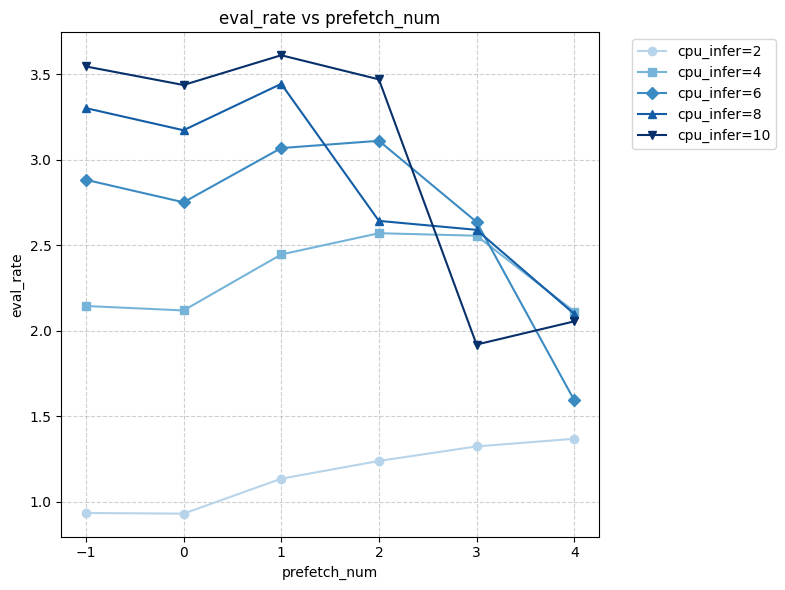

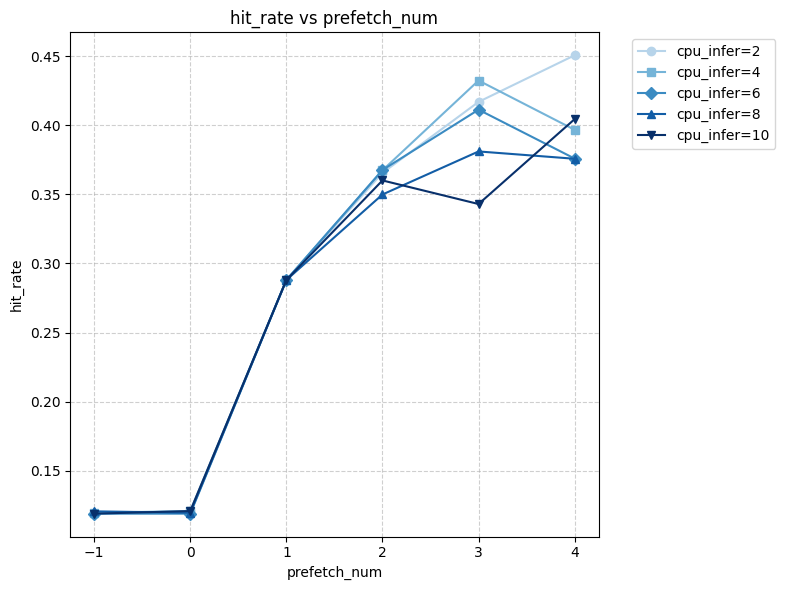

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## 绘制实验结果折线图
# 读取 experiment_results.csv 文件，并绘制两个折线图：
# 1. eval_rate vs prefetch_num
# 2. hit_rate vs prefetch_num
# 横轴为 prefetch_num，
# 不同 cpu_infer 用颜色深浅和点形状区分，legend 放在图外。

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 读取 CSV 文件
csv_file = "./experiment_results.csv"
df = pd.read_csv(csv_file)

# 获取 cpu_infer 的所有取值
cpu_infers = sorted(df["cpu_infer"].unique())

# 定义颜色映射和标记样式
colors = cm.Blues(np.linspace(0.3, 1, len(cpu_infers)))
markers = ["o", "s", "D", "^", "v", "<", ">", "p", "h", "x", "*"]

# 绘制 eval_rate 折线图
plt.figure(figsize=(8,6))
for i, cpu_infer in enumerate(cpu_infers):
    group = df[df["cpu_infer"] == cpu_infer]
    plt.plot(group["prefetch_num"], group["eval_rate"], 
             marker=markers[i % len(markers)], 
             color=colors[i], 
             label=f"cpu_infer={cpu_infer}")

plt.xlabel("prefetch_num")
plt.ylabel("eval_rate")
plt.title("eval_rate vs prefetch_num")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例放在右侧外部
plt.tight_layout()
plt.show()

# 绘制 hit_rate 折线图
plt.figure(figsize=(8,6))
for i, cpu_infer in enumerate(cpu_infers):
    group = df[df["cpu_infer"] == cpu_infer]
    plt.plot(group["prefetch_num"], group["hit_rate"], 
             marker=markers[i % len(markers)], 
             color=colors[i], 
             label=f"cpu_infer={cpu_infer}")

plt.xlabel("prefetch_num")
plt.ylabel("hit_rate")
plt.title("hit_rate vs prefetch_num")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 图例放在右侧外部
plt.tight_layout()
plt.show()

✅ 提取到 10 个 seq len 段落：[400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000]


/tmp/ipykernel_1102976/1939743488.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=seq_lens, patch_artist=True, showmeans=True)


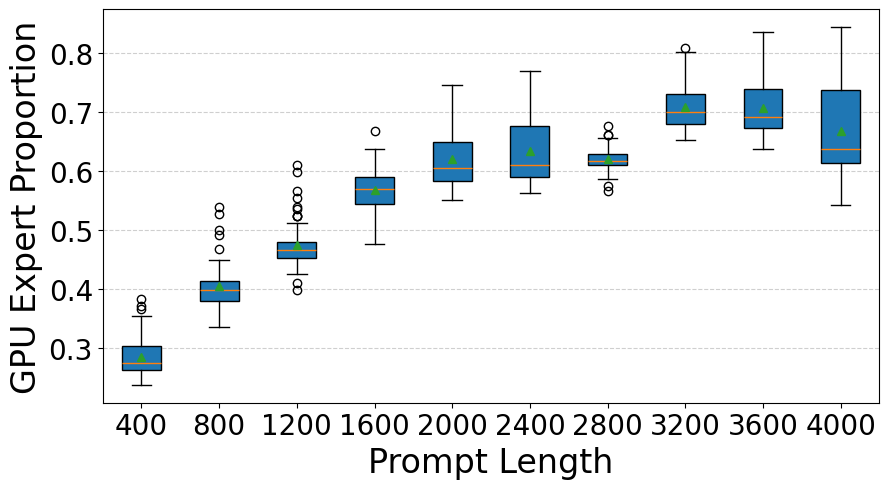

In [18]:
# prefill 实验3
import re
import matplotlib.pyplot as plt
import numpy as np

# 读取实验数据
file_path = "prefill_expert_alloc.txt"  # 修改为你的文件路径
with open(file_path, "r") as f:
    content = f.read()

# 匹配每一段 “seq len = xxx” 开头的部分
pattern = re.compile(r"-{5,}seq len\s*=\s*(\d+)-{5,}\n(.*?)(?=\n-{5,}seq len|\Z)", re.S)
matches = pattern.findall(content)

seq_data = {}
for seq_len, block in matches:
    seq_len = int(seq_len)
    experts = re.findall(r"blk\.\d+\s*-\s*GPU gets\s*(\d+)\s*experts", block)
    experts = list(map(int, experts))

    if experts:
        proportions = [e / 256 for e in experts]
        if seq_len not in seq_data:
            seq_data[seq_len] = []
        seq_data[seq_len].extend(proportions)

# 检查是否提取到数据
if not seq_data:
    print("⚠️ 未检测到任何 seq len 段落，请检查文件格式。")
else:
    print(f"✅ 提取到 {len(seq_data)} 个 seq len 段落：{sorted(seq_data.keys())}")

# 绘制 boxplot
seq_lens = sorted(seq_data.keys())
data = [seq_data[l] for l in seq_lens]

plt.figure(figsize=(9, 5))
plt.boxplot(data, labels=seq_lens, patch_artist=True, showmeans=True)
plt.xlabel("Prompt Length", fontsize=24)
plt.ylabel("GPU Expert Proportion", fontsize=24)
# plt.title("Distribution of GPU-Cached Expert Proportions per Sequence Length", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("expert_gpu_boxplot.pdf", bbox_inches='tight')
plt.show()

In [71]:
# baseline decode performance
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

kt_results = pd.read_csv("/workspace/expirments/KTexpirments/kt_20251009-105221_results.csv")
# 按数据集分组，计算平均值
grouped = kt_results.groupby('dataset_name')[['eval_count', 'eval_duration', 'eval_rate']].mean().reset_index()
kt_baseline = grouped
kt_baseline['TPT'] = kt_baseline['eval_duration']/kt_baseline['eval_count']
kt_baseline
# 打印结果查看
# print(grouped)

# # 绘制平均 eval_duration 柱状图
# plt.figure(figsize=(8, 5))
# plt.bar(grouped['dataset_name'], grouped['eval_duration'])
# plt.xlabel('Dataset', fontsize=12)
# plt.ylabel('Average eval_duration (s)', fontsize=12)
# plt.title('Average eval_duration per Dataset', fontsize=13)
# plt.xticks(rotation=30)
# plt.tight_layout()
# # plt.savefig('avg_eval_duration.png', dpi=300)
# plt.show()

# # 绘制平均 eval_rate 柱状图
# plt.figure(figsize=(8, 5))
# plt.bar(grouped['dataset_name'], grouped['eval_rate'])
# plt.xlabel('Dataset', fontsize=12)
# plt.ylabel('Average eval_rate (tokens/s)', fontsize=12)
# plt.title('Average eval_rate per Dataset', fontsize=13)
# plt.xticks(rotation=30)
# plt.tight_layout()
# # plt.savefig('avg_eval_rate.png', dpi=300)
# plt.show()

,dataset_name,eval_count,eval_duration,eval_rate,TPT
0,awesome_chatgpt_prompts,49.666667,15.621410,3.084264,0.314525
1,flores101,100.000000,31.931659,3.132204,0.319317
2,gsm8k,100.000000,31.022499,3.223797,0.310225
3,humaneval,100.000000,30.792424,3.248145,0.307924
4,triviaqa,79.066667,25.510876,3.099867,0.322650
5,xsum,100.000000,31.371062,3.188052,0.313711


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

layer_results = pd.read_csv("20251009-031029_results_layer_strategy0.csv")
token_results_0 = pd.read_csv("20251008-214435_results_token_strategy0_start0.csv")
token_results_29 = pd.read_csv("20251008-232811_results_token_strategy0_start29.csv")
xsum_result_29 = pd.read_csv("xsum_20251009-151126_results_token_strategy0_start29.csv")
len(layer_results), len(token_results_0),len(token_results_29)

layer_grouped = layer_results.groupby(['dataset_name', 'prefetch_num'])[['eval_count', 'eval_duration','eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()
# layer_grouped = layer_grouped[layer_grouped['prefetch_num']!=-1]
# layer_grouped = layer_grouped[layer_grouped['prefetch_num']!=0]
layer_idx = layer_grouped.groupby('dataset_name')['eval_rate'].idxmax()
layer_best = layer_grouped.loc[layer_idx].reset_index(drop=True)
layer_best['TPT'] = layer_best['eval_duration']/layer_best['eval_count']
# print(layer_best)
# print(layer_grouped)

token0_grouped = token_results_0.groupby(['dataset_name', 'prefetch_num'])[['eval_count', 'eval_duration','eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()
# token0_grouped = token0_grouped[token0_grouped['prefetch_num']!=-1]
token0_idx = token0_grouped.groupby('dataset_name')['eval_rate'].idxmax()
token0_best = token0_grouped.loc[token0_idx].reset_index(drop=True)
token0_best['TPT'] = token0_best['eval_duration']/token0_best['eval_count']
# print(token0_best)
# print(token0_grouped)

token29_grouped = token_results_29.groupby(['dataset_name', 'prefetch_num'])[['eval_count', 'eval_duration','eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()
token29_grouped = token29_grouped[token29_grouped['dataset_name']!="xsum"]
token29_xsum = xsum_result_29.groupby(['dataset_name', 'prefetch_num'])[['eval_count', 'eval_duration','eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()
token29_grouped = pd.concat([token29_grouped, token29_xsum], axis=0).reset_index(drop=True)

token29_idx = token29_grouped.groupby('dataset_name')['eval_rate'].idxmax()
token29_best = token29_grouped.loc[token29_idx].reset_index(drop=True)
token29_best['TPT'] = token29_best['eval_duration']/token29_best['eval_count']

layer_best, token0_best, token29_best


(              dataset_name  prefetch_num  eval_count  eval_duration  \
 0  awesome_chatgpt_prompts            -1        49.6      14.900664   
 1                flores101            -1       100.0      32.603071   
 2                    gsm8k            -1       100.0      30.500248   
 3                humaneval            -1       100.0      31.647564   
 4                 triviaqa            -1        77.6      25.184508   
 5                     xsum            -1       100.0      30.227710   
 
    eval_rate  hit_rate  prefetch_hit_rate       TPT  
 0   3.518070    0.0760             0.0572  0.300417  
 1   3.067580    0.0918             0.0842  0.326031  
 2   3.278685    0.0590             0.0554  0.305002  
 3   3.161019    0.0592             0.0518  0.316476  
 4   3.082618    0.1402             0.1500  0.324543  
 5   3.310976    0.1320             0.1372  0.302277  ,
               dataset_name  prefetch_num  eval_count  eval_duration  \
 0  awesome_chatgpt_prompts         

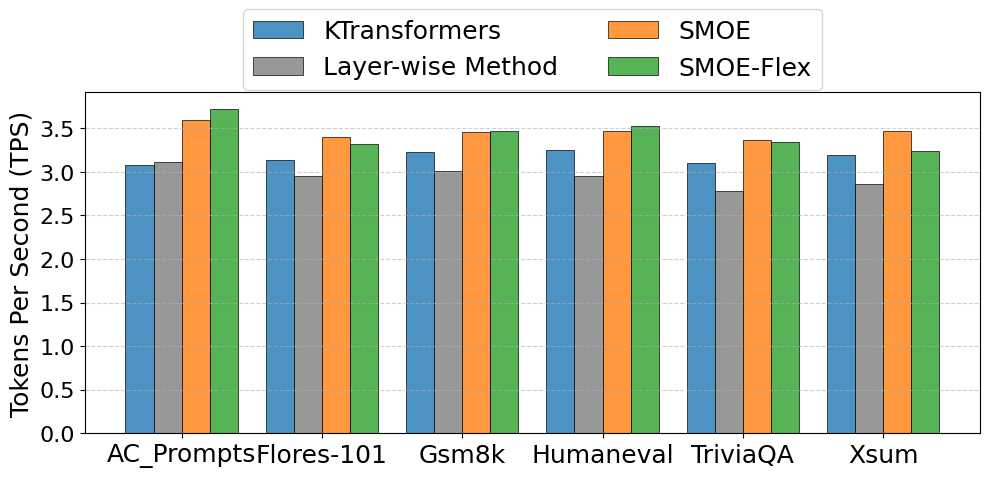

In [115]:

# 假设你已有四个 DataFrame
dfs = {
    'KTransformers': kt_baseline,
    'Layer-wise Method': layer_best,
    'SMOE': token0_best,
    'SMOE-Flex': token29_best
}

datasets = kt_baseline['dataset_name'].tolist()  # 假设所有 df dataset_name 顺序一致

# --- 绘制 eval_duration ---
x = np.arange(len(datasets))
datasets_names = ['AC_Prompts', 'Flores-101', 'Gsm8k', 'Humaneval', 'TriviaQA', 'Xsum']
width = 0.2  # 柱宽
colors = ['#1f77b4', '#7f7f7f', '#ff7f0e', '#2ca02c', ]  # 蓝、橙、绿、灰

# --- 绘制 eval_rate ---
plt.figure(figsize=(10, 5))

for i, (name, df) in enumerate(dfs.items()):
    plt.bar(x + i*width, df['eval_rate'], width=width, label=name,
            color=colors[i], edgecolor='black', linewidth=0.6, alpha=0.8)

plt.xticks(x + 1.5*width, datasets_names, rotation=0)
plt.ylabel("Tokens Per Second (TPS)", fontsize=18)
# plt.title("Comparison of Eval Rate Across Methods")
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.28), ncol=2, fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("decode_tps.pdf", bbox_inches='tight')
plt.show()

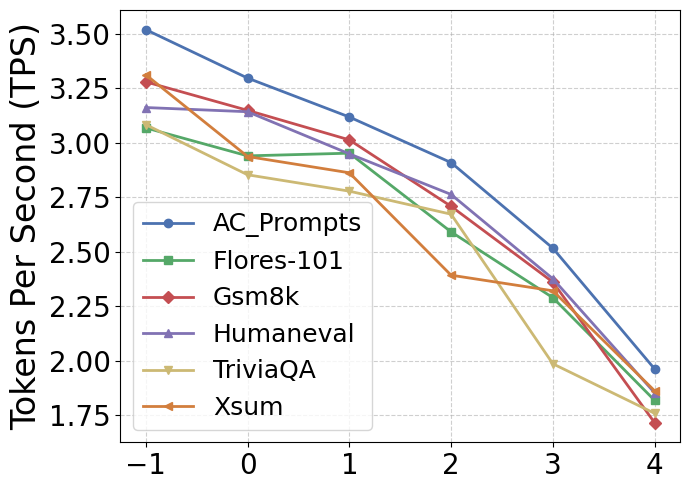

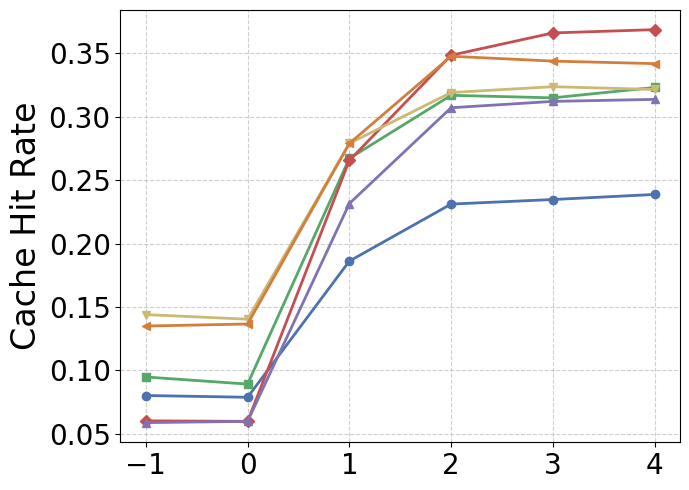

In [146]:

# ===== 3. 绘图 =====
metrics = ['eval_rate', 'hit_rate']
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974', '#d27e3d']  # 柔和配色
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x', '*']
custom_labels = ['AC_Prompts', 'Flores-101', 'Gsm8k', 'Humaneval', 'TriviaQA', 'Xsum']
plt.figure(figsize=(7, 5))
for i, (dataset, group) in enumerate(layer_grouped.groupby('dataset_name')):
    plt.plot(group['prefetch_num'], group['eval_rate'], marker=markers[i % len(markers)], label=dataset, color=colors[i % len(colors)], linewidth=2)

# plt.title(f"Average {metric} vs Prefetch Num")
# plt.xlabel("Prefetch Expert Num", fontsize=24)
plt.ylabel("Tokens Per Second (TPS)", fontsize=24)
plt.legend(custom_labels, loc='lower left', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("layer_tps.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=(7, 5))
for i, (dataset, group) in enumerate(token0_grouped.groupby('dataset_name')):
    plt.plot(group['prefetch_num'], group['hit_rate'], marker=markers[i % len(markers)], label=dataset, color=colors[i % len(colors)], linewidth=2)

# plt.title(f"Average {metric} vs Prefetch Num")
# plt.xlabel("Prefetch Expert Num", fontsize=24)
plt.ylabel("Cache Hit Rate", fontsize=24)
# plt.legend(custom_labels, loc='upper left', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("layer_hitrate.pdf", bbox_inches='tight')
plt.show()

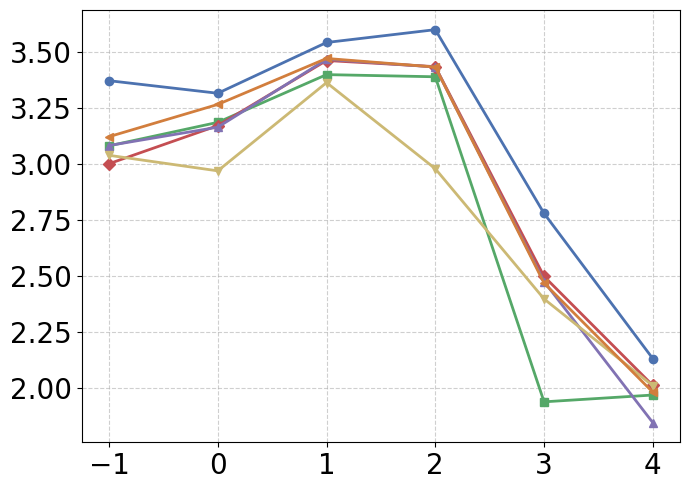

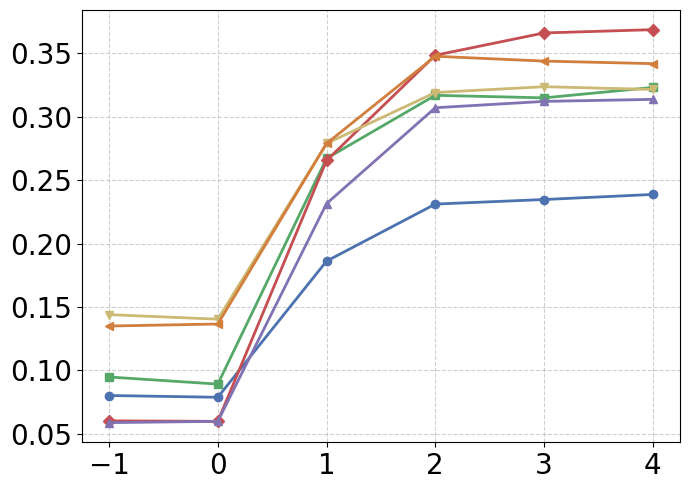

In [147]:

# ===== 3. 绘图 =====
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974', '#d27e3d']  # 柔和配色

plt.figure(figsize=(7, 5))
for i, (dataset, group) in enumerate(token0_grouped.groupby('dataset_name')):
    plt.plot(group['prefetch_num'], group['eval_rate'], marker=markers[i % len(markers)], label=dataset, color=colors[i % len(colors)], linewidth=2)

# plt.title(f"Average {metric} vs Prefetch Num")
# plt.xlabel("Prefetch Expert Num", fontsize=24)
# plt.ylabel("TPS", fontsize=24)
# plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("token0_tps.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=(7, 5))
for i, (dataset, group) in enumerate(token0_grouped.groupby('dataset_name')):
    plt.plot(group['prefetch_num'], group['hit_rate'], marker=markers[i % len(markers)], label=dataset, color=colors[i % len(colors)], linewidth=2)

# plt.title(f"Average {metric} vs Prefetch Num")
# plt.xlabel("Prefetch Expert Num", fontsize=24)
# plt.ylabel("Cache Hit Rate", fontsize=24)
# plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("token0_hitrate.pdf", bbox_inches='tight')
plt.show()

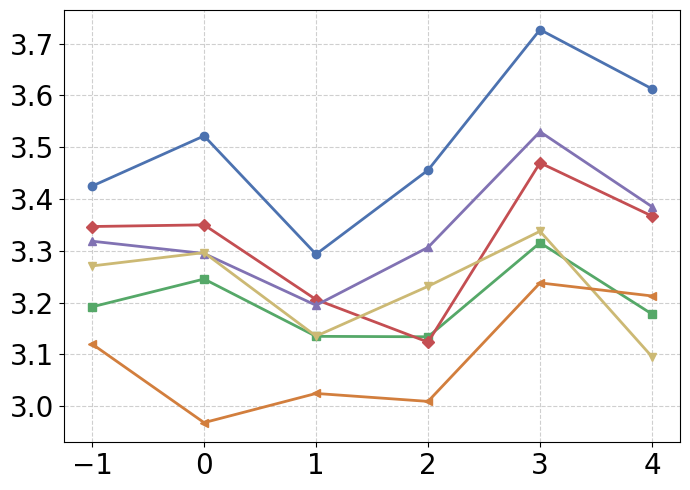

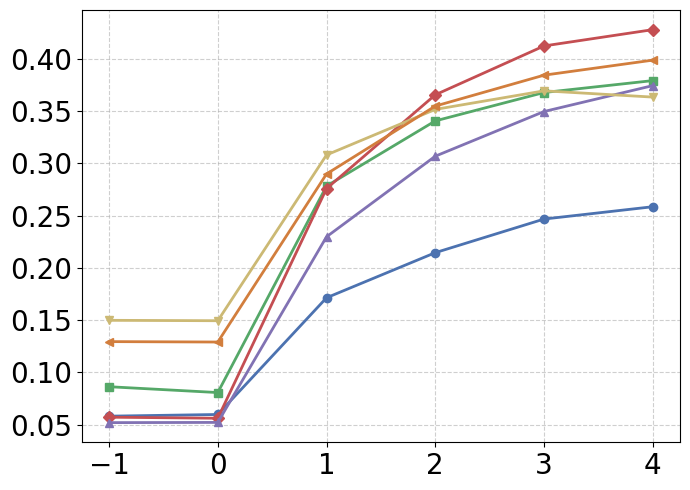

In [148]:
# token29_grouped = token_results_29.groupby(['dataset_name', 'prefetch_num'])[['eval_rate', 'hit_rate', 'prefetch_hit_rate']].mean().reset_index()

# ===== 3. 绘图 =====
metrics = ['eval_rate', 'prefetch_hit_rate']
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974', '#d27e3d']  # 柔和配色

plt.figure(figsize=(7, 5))
for i, (dataset, group) in enumerate(token29_grouped.groupby('dataset_name')):
    plt.plot(group['prefetch_num'], group['eval_rate'], marker=markers[i % len(markers)], label=dataset, color=colors[i % len(colors)], linewidth=2)

# plt.title(f"Average {metric} vs Prefetch Num")
# plt.xlabel("Prefetch Expert Num", fontsize=24)
# plt.ylabel("TPS", fontsize=24)
# plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("token29_tps.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=(7, 5))
for i, (dataset, group) in enumerate(token29_grouped.groupby('dataset_name')):
    plt.plot(group['prefetch_num'], group['prefetch_hit_rate'], marker=markers[i % len(markers)], label=dataset, color=colors[i % len(colors)], linewidth=2)

# plt.title(f"Average {metric} vs Prefetch Num")
# plt.xlabel("Prefetch Expert Num", fontsize=24)
# plt.ylabel("Cache Hit Rate", fontsize=24)
# plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("token29_hitrate.pdf", bbox_inches='tight')
plt.show()

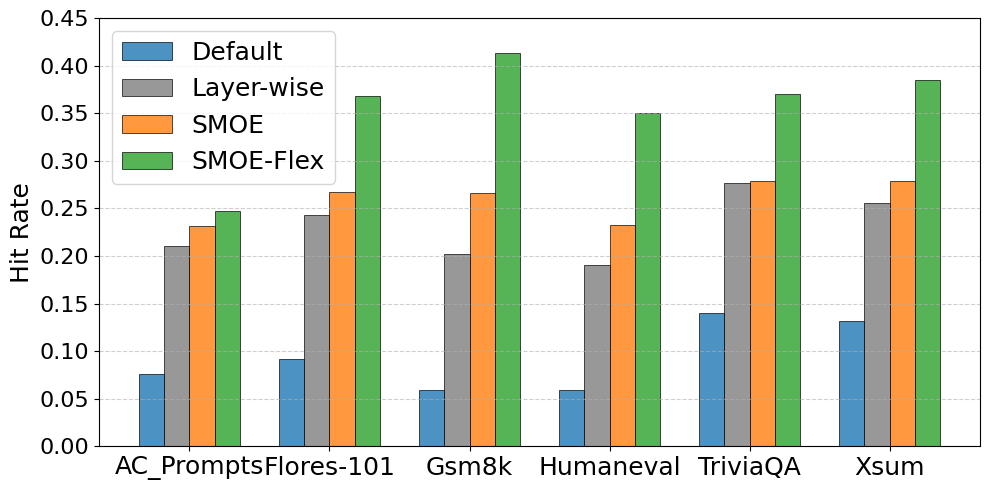

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# 数据集名称
datasets = ["AC_Prompts", "Flores-101", "Gsm8k", "Humaneval", "TriviaQA", "Xsum"]
colors = ['#1f77b4', '#7f7f7f', '#ff7f0e', '#2ca02c', ]
# Hit Rate 数据
default_hit = [0.0760, 0.0918, 0.0590, 0.0592, 0.1402, 0.1320]
layer_hit = [0.210, 0.243, 0.202, 0.190, 0.277, 0.256]
smoe_hit = [0.231, 0.267, 0.266, 0.232, 0.279, 0.279]
smoe_flex_hit = [0.247, 0.368, 0.413, 0.350, 0.370, 0.385]

# 设置柱状图参数
x = np.arange(len(datasets))
width = 0.18  # 每组柱宽，四组柱子需稍小

plt.figure(figsize=(10, 5))

# 绘制柱状图
plt.bar(x - 1.5*width, default_hit, width=width, label='Default', color=colors[0], edgecolor='black', linewidth=0.6, alpha=0.8)
plt.bar(x - 0.5*width, layer_hit, width=width, label='Layer-wise', color=colors[1], edgecolor='black', linewidth=0.6, alpha=0.8)
plt.bar(x + 0.5*width, smoe_hit, width=width, label='SMOE', color=colors[2], edgecolor='black', linewidth=0.6, alpha=0.8)
plt.bar(x + 1.5*width, smoe_flex_hit, width=width, label='SMOE-Flex', color=colors[3], edgecolor='black', linewidth=0.6, alpha=0.8)

# 标签和标题
plt.xticks(x, datasets, rotation=0, fontsize=18)
plt.ylabel("Hit Rate", fontsize=18)
plt.yticks(fontsize=16)

# plt.title("Hit Rate Comparison Across Methods", fontsize=16)
plt.ylim(0, 0.45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 图例
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("hit_rate_comparison.pdf", bbox_inches='tight')
plt.show()

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 文件夹路径
SMOE_DIR = "./decode_tokens"          # SMOE decode logs
KT_DIR   = "./KTexpirments/decode_tokens_kt"          # KTransformers decode logs

OUT_PPL_CSV = "./ppl_compare.csv"

NUM_PROMPTS = 5
EPS = 1e-12   # 数值稳定用

def load_decode_csv(path):
    """
    读取 decode csv，并进行基本一致性检查
    """
    df = pd.read_csv(path)
    required_cols = {"token_id", "score", "prob"}
    assert required_cols.issubset(df.columns), f"Missing columns in {path}"
    return df


def compute_nll(prob):
    """
    token-level NLL
    """
    return -np.log(np.clip(prob, EPS, 1.0))


def compute_ppl(prob):
    """
    sequence-level perplexity
    """
    nll = compute_nll(prob)
    return np.exp(nll.mean())

records = []

for k in range(NUM_PROMPTS):
    fname = f"gsm8k_{k}.csv"

    smoe_path = os.path.join(SMOE_DIR, fname)
    kt_path   = os.path.join(KT_DIR, fname)

    df_smoe = load_decode_csv(smoe_path)
    df_kt   = load_decode_csv(kt_path)

    # token 数量一致性
    assert len(df_smoe) == len(df_kt), f"Token length mismatch in prompt {k}"

    ppl_smoe = compute_ppl(df_smoe["prob"].values)
    ppl_kt   = compute_ppl(df_kt["prob"].values)

    records.append({
        "prompt_id": k,
        "ppl_smoe": ppl_smoe,
        "ppl_ktransformers": ppl_kt,
        "abs_diff": abs(ppl_smoe - ppl_kt)
    })

ppl_df = pd.DataFrame(records)
ppl_df



,prompt_id,ppl_smoe,ppl_ktransformers,abs_diff
0,0,1.073065,1.073065,0.0
1,1,1.060338,1.060338,0.0
2,2,1.125646,1.125646,0.0
3,3,1.085627,1.085627,0.0
4,4,1.136551,1.136551,0.0


In [6]:
ppl_df.to_csv(OUT_PPL_CSV, index=False)
print(f"PPL comparison saved to {OUT_PPL_CSV}")

PPL comparison saved to ./ppl_compare.csv


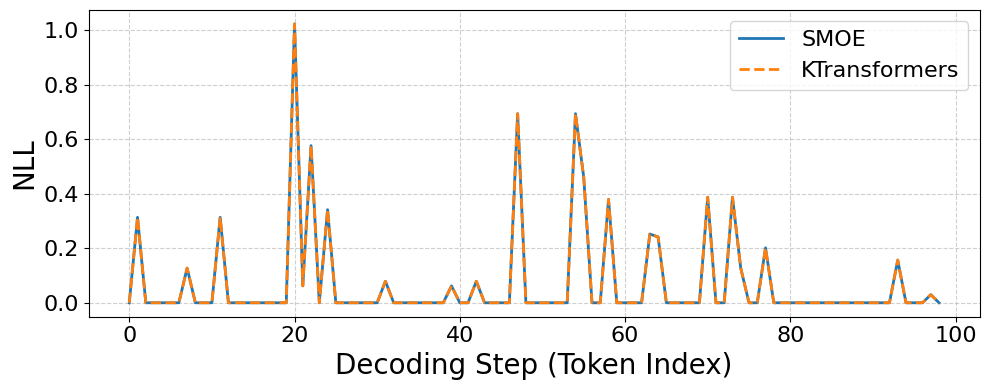

In [11]:
# 只画 gsm8k_0
fname = "gsm8k_0.csv"

df_smoe = load_decode_csv(os.path.join(SMOE_DIR, fname))
df_kt   = load_decode_csv(os.path.join(KT_DIR, fname))

nll_smoe = compute_nll(df_smoe["prob"].values)
nll_kt   = compute_nll(df_kt["prob"].values)

tokens = np.arange(len(nll_smoe))

plt.figure(figsize=(10, 4))

plt.plot(tokens, nll_smoe, label="SMOE", linewidth=2)
plt.plot(tokens, nll_kt, linestyle="--", label="KTransformers", linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Decoding Step (Token Index)", fontsize=20)
plt.ylabel("NLL", fontsize=20)
# plt.title("Token-level NLL Comparison on gsm8k_0")
plt.legend(fontsize=16)
plt.grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('./gsm8k_0_nll_compare.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# notebook 里显示高清图
%matplotlib inline
plt.rcParams["figure.dpi"] = 120

In [9]:
csv_path = "system_util_trace.csv"

df = pd.read_csv(csv_path)

# 把 timestamp 转成相对时间（秒）
t0 = df["timestamp"].iloc[0]
df["time"] = df["timestamp"] - t0

df.head()

,timestamp,gpu_util,gpu_mem_ctrl_util,gpu_mem_used_MB,gpu_mem_util_pct,pcie_tx_MBps,pcie_rx_MBps,cpu_total_util,cpu_proc_util,time
0,1.767105e+09,10,0,21518.5625,87.602029,16.748047,23.535156,1.4,0.0,0.000000
1,1.767105e+09,1,0,21528.5625,87.642739,304.150391,0.292969,1.5,0.0,0.143162
2,1.767105e+09,1,0,21528.5625,87.642739,0.292969,7750.439453,2.6,0.0,0.285257
3,1.767105e+09,1,0,21528.5625,87.642739,0.341797,4535.791016,2.5,7.0,0.427517
4,1.767105e+09,1,0,21528.5625,87.642739,0.341797,2885.498047,2.2,0.0,0.569718


In [10]:
df.describe()

,timestamp,gpu_util,gpu_mem_ctrl_util,gpu_mem_used_MB,gpu_mem_util_pct,pcie_tx_MBps,pcie_rx_MBps,cpu_total_util,cpu_proc_util,time
count,4.200000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,1.767105e+09,29.464286,4.997619,20552.091667,83.667528,414.539156,5039.651925,1.745238,1.410476,30.023273
std,1.738036e+01,22.387479,4.073606,4495.323221,18.300453,344.159444,4053.414969,0.927697,2.804477,17.380358
min,1.767105e+09,0.000000,0.000000,472.375000,1.923038,0.292969,0.244141,0.000000,0.000000,0.000000
25%,1.767105e+09,0.000000,0.000000,21558.562500,87.764869,0.341797,0.292969,0.600000,0.000000,15.029808
50%,1.767105e+09,41.000000,7.000000,21558.562500,87.764869,509.570312,6147.534180,2.100000,0.000000,30.061572
75%,1.767105e+09,47.250000,9.000000,21558.562500,87.764869,674.951172,8577.209473,2.400000,0.000000,45.041806
max,1.767105e+09,59.000000,11.000000,21558.562500,87.764869,1058.496094,12258.593750,4.100000,7.100000,59.992886


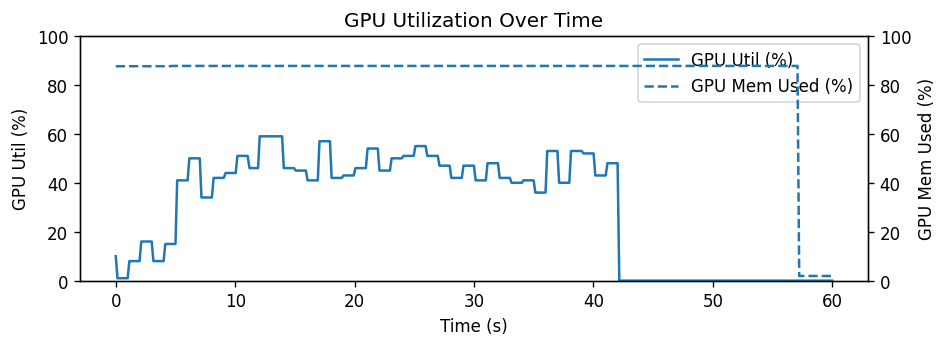

In [12]:
fig, ax1 = plt.subplots(figsize=(8, 3))

ax1.plot(df["time"], df["gpu_util"], label="GPU Util (%)")
ax1.set_ylabel("GPU Util (%)")
ax1.set_xlabel("Time (s)")
ax1.set_ylim(0, 100)

ax2 = ax1.twinx()
ax2.plot(df["time"], df["gpu_mem_util_pct"], linestyle="--", label="GPU Mem Used (%)")
ax2.set_ylabel("GPU Mem Used (%)")
ax2.set_ylim(0, 100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

plt.title("GPU Utilization Over Time")
plt.tight_layout()
plt.show()

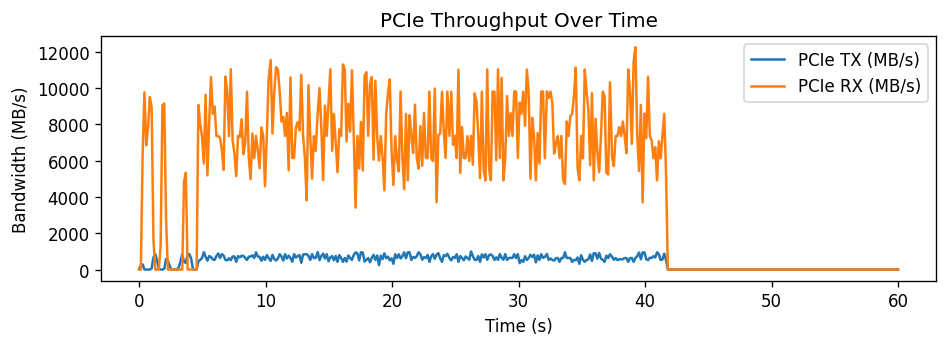

In [5]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df["time"], df["pcie_tx_MBps"], label="PCIe TX (MB/s)")
ax.plot(df["time"], df["pcie_rx_MBps"], label="PCIe RX (MB/s)")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Bandwidth (MB/s)")
ax.legend()
ax.set_title("PCIe Throughput Over Time")

plt.tight_layout()
plt.show()

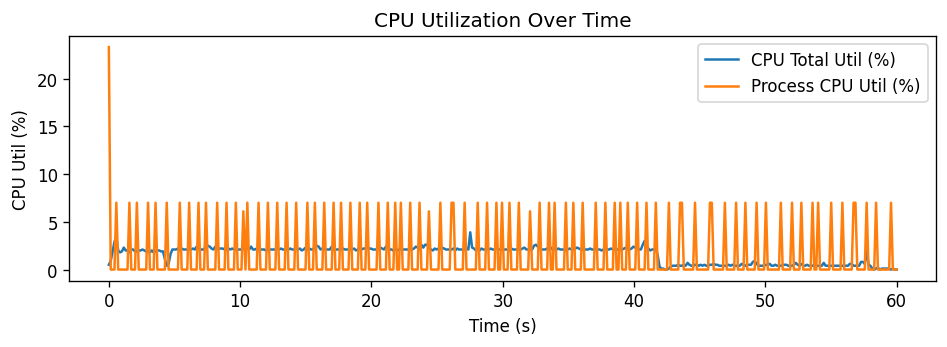

In [6]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df["time"], df["cpu_total_util"], label="CPU Total Util (%)")
ax.plot(df["time"], df["cpu_proc_util"], label="Process CPU Util (%)")

ax.set_xlabel("Time (s)")
ax.set_ylabel("CPU Util (%)")
ax.legend()
ax.set_title("CPU Utilization Over Time")

plt.tight_layout()
plt.show()

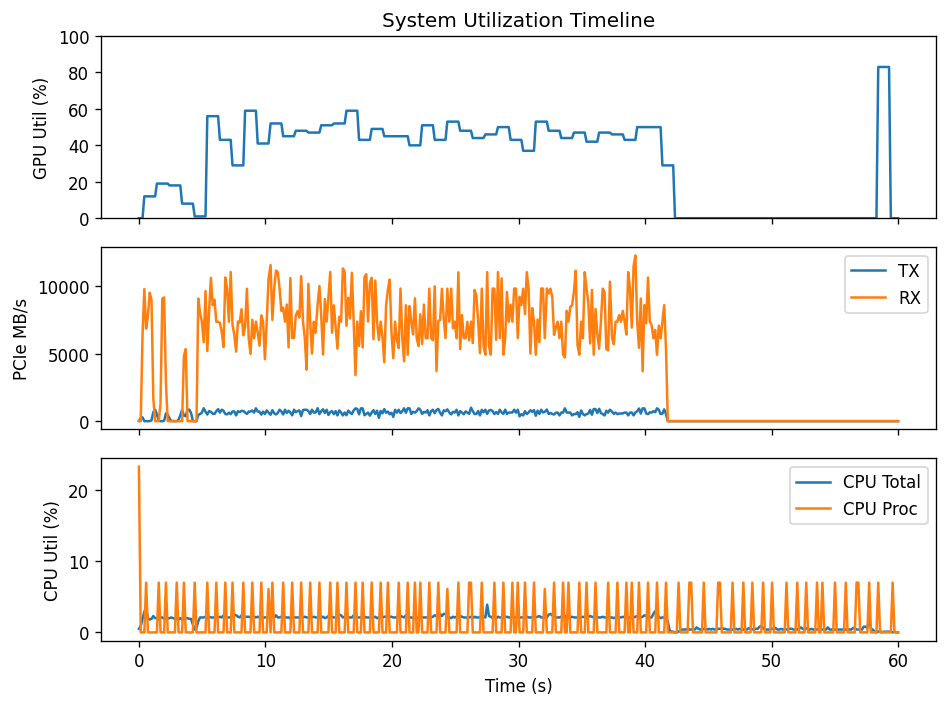

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# GPU
axs[0].plot(df["time"], df["gpu_util"])
axs[0].set_ylabel("GPU Util (%)")
axs[0].set_ylim(0, 100)
axs[0].set_title("System Utilization Timeline")

# PCIe
axs[1].plot(df["time"], df["pcie_tx_MBps"], label="TX")
axs[1].plot(df["time"], df["pcie_rx_MBps"], label="RX")
axs[1].set_ylabel("PCIe MB/s")
axs[1].legend()

# CPU
axs[2].plot(df["time"], df["cpu_total_util"], label="CPU Total")
axs[2].plot(df["time"], df["cpu_proc_util"], label="CPU Proc")
axs[2].set_ylabel("CPU Util (%)")
axs[2].set_xlabel("Time (s)")
axs[2].legend()

plt.tight_layout()
plt.show()